In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [5]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [5]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [32]:
df = pd.read_csv("./adult.data", names=cols)

In [33]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [8]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [9]:
df.groupby("sex").age.mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [21]:
df[df['native-country'] == ' United-States'].shape[0]/df.shape[0] * 100

89.5857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0, 0.5, 'Вид образования')

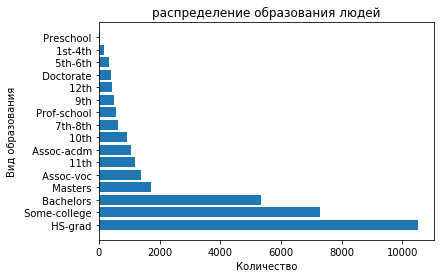

In [37]:
plt.barh(df['education'].value_counts().index, df['education'].value_counts().values)
plt.title('распределение образования людей')
plt.xlabel('Количество')
plt.ylabel('Вид образования')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое 
распределение оно вам напоминает?)

(array([171., 140., 123., 120., 131., 279., 278., 201., 257., 275., 382.,
        389., 292., 224., 171., 135., 119., 103.,  83.,  69.,  84.,  72.,
         78.,  50.,  40.,  31.,  26.,  24.,  16.,   9.,  10.,  10.,   6.,
          8.,   4.,   4.,   5.,   3.,   1.,   2.,   1.,   0.,   3.,   0.,
          0.,   2.,   2.,   0.,   1.,   3.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  19410.  ,   34062.95,   48715.9 ,   63368.85,   78021.8 ,
          92674.75,  107327.7 ,  121980.65,  136633.6 ,  151286.55,
         165939.5 ,  180592.45,  195245.4 ,  209898.35,  224551.3 ,
         239204.25,  253857.2 ,  268510.15,  283163.1 ,  297816.05,
         312469.  ,  327121.95,  341774.9 ,  3

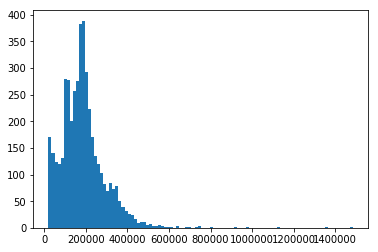

In [38]:
plt.hist(df[df['marital-status'] == ' Divorced']['fnlwgt'], bins=100)

In [39]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].mean()

185802.79045689848

In [40]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].std()

105646.78945933603

In [ ]:
Распределение Пуассона

> Ответ: оно мне напоминает ... распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [47]:
a = df[(df['result'] == ' >50K') & ((df['education'] == ' Bachelors') |
  (df['education'] == ' Masters') | (df['education'] == ' Doctorate'))].shape[0]

In [45]:
b = df[(df['result'] == ' >50K') & ((df['education'] != ' Bachelors') &
  (df['education'] != ' Masters') & (df['education'] != ' Doctorate'))].shape[0]

In [48]:
print(a/b) #если меньше единицы -> нет, если больше -> да

0.800459242250287


> Ответ: Правда / Нет.

In [ ]:
Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [52]:
df.groupby("education")['hours-per-week'].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [53]:
df.groupby("sex")['hours-per-week'].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [56]:
df.groupby("marital-status")['hours-per-week'].mean()

marital-status
 Divorced                 41.246680
 Married-AF-spouse        41.130435
 Married-civ-spouse       43.284856
 Married-spouse-absent    39.669856
 Never-married            36.939998
 Separated                39.301463
 Widowed                  32.979859
Name: hours-per-week, dtype: float64

# Из каких стран люди работают farmers/fishers?

In [62]:
df[df['occupation'] == ' Farming-fishing']['native-country'].value_counts()

 United-States    879
 Mexico            77
 ?                  5
 Puerto-Rico        5
 Philippines        4
 Guatemala          4
 Cuba               2
 Canada             2
 El-Salvador        2
 Italy              2
 Vietnam            2
 Japan              1
 Ireland            1
 Yugoslavia         1
 Poland             1
 France             1
 Portugal           1
 Germany            1
 Hong               1
 Cambodia           1
 England            1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [64]:
max(df['hours-per-week'].values)

99

In [65]:
df[df['hours-per-week'] == 99].shape[0]

85

In [66]:
df[df['hours-per-week'] == 99]['result']

935        >50K
1172       >50K
1887       >50K
3578       >50K
4086      <=50K
4308      <=50K
4441       >50K
5376      <=50K
5432      <=50K
6618      <=50K
6898      <=50K
8072      <=50K
8393       >50K
8654      <=50K
8796       >50K
9811      <=50K
9831      <=50K
10143     <=50K
10266     <=50K
10468     <=50K
10986      >50K
11833     <=50K
12209     <=50K
12625     <=50K
12788     <=50K
13558      >50K
13580     <=50K
13617     <=50K
13858      >50K
14593     <=50K
          ...  
23226     <=50K
23398     <=50K
23649      >50K
23830     <=50K
24483      >50K
25354     <=50K
25713      >50K
25806     <=50K
25831      >50K
25986     <=50K
26250     <=50K
26596      >50K
26638     <=50K
26858     <=50K
27222     <=50K
27764     <=50K
27809     <=50K
28112     <=50K
29187      >50K
29751     <=50K
29989      >50K
30036      >50K
30610      >50K
30754     <=50K
30766      >50K
30992     <=50K
31681      >50K
31699     <=50K
32469     <=50K
32531     <=50K
Name: result, Length: 85